In [13]:
import numpy as np
import pandas as pd
import parking_problem as park
import matplotlib.pyplot as plt

Setting up the environment

In [14]:
park_slots = 20
price_range = 8
env = park.Parking_Facility(park_slots, price_range)
V = np.zeros(park_slots + 1)
pi = np.ones((park_slots + 1, price_range)) / price_range
#pi refers to the policy as a two-dimensional array where the (i,j)-th entry gives 
#the probability of taking action  in state .

Policy evaluation

In [15]:
def policy_evaluation(env, V, pi, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
            
    return V

In [16]:
def bellman_update(env, V, pi, s, gamma):
    actions = pi[s]
    G = [0] * len(actions)
    
    for action in env.A:
        transitions = env.transitions(s, action)
        
        for s_, (r,p) in enumerate(transitions):
            G[action] += p * (r + gamma * V[s_])
            
    V[s] = np.sum(G * actions)

In [17]:
park_slots = 20
price_range = 8
env = park.Parking_Facility(park_slots, price_range)
V = np.zeros(park_slots + 1)
parking_policy = np.zeros((park_slots + 1, price_range))
parking_policy[:, 1] = 1
gamma = 0.9
theta = 0.1
V = policy_evaluation(env, V, parking_policy, gamma, theta)


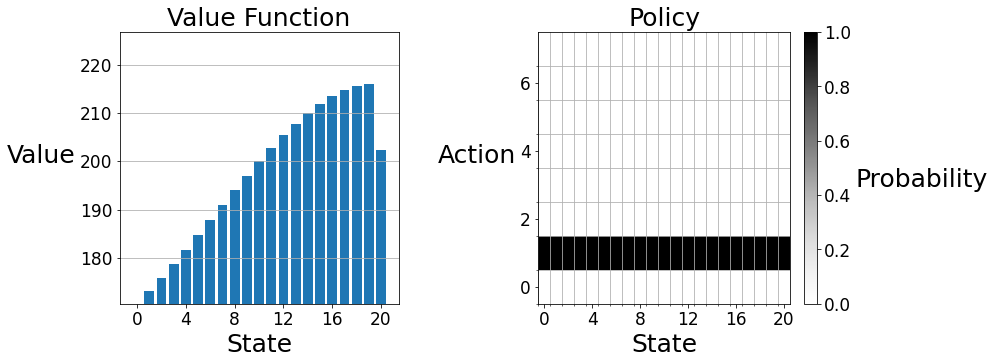

In [18]:
park.plot(V, parking_policy)

In [19]:
States = np.array([i for i in env.S])
Value = np.array([i for i in V])
 
#pi = np.array([i for i, e in enumerate(pi) if e != 0])
df = pd.DataFrame({'States':States, 'Value':Value})
print(df)

    States       Value
0        0  170.519796
1        1  173.078530
2        2  175.834561
3        3  178.731247
4        4  181.726437
5        5  184.785409
6        6  187.877184
7        7  190.972448
8        8  194.041803
9        9  197.045936
10      10  199.952810
11      11  202.732133
12      12  205.351950
13      13  207.778328
14      14  209.975027
15      15  211.903129
16      16  213.520631
17      17  214.781959
18      18  215.608166
19      19  215.933569
20      20  202.391146


In [20]:
env.A

[0, 1, 2, 3, 4, 5, 6, 7]

Policy Iteration

In [28]:
def policy_change(env, V, pi, gamma):
    policy_stable = True
    for s in env.S:
        old = pi[s].copy()
        greedy_policy(env, V, pi, s, gamma)
        
        if not np.array_equal(pi[s], old):
            policy_stable = False
            
    return pi, policy_stable

In [46]:
def policy_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    policy_stable = False
    
    while not policy_stable:
        V = policy_evaluation(env, V, pi, gamma, theta)
        pi, policy_stable = policy_change(env, V, pi, gamma)
        
    return V, pi

In [47]:
def greedy_policy(env, V, pi, s, gamma):
    G = [0] * len(env.A)
    for action in env.A:
        transitions = env.transitions(s, action)
        for s_, (r,p) in enumerate(transitions):
            G[action] += p * (r + gamma * V[s_])
            
    best_action = np.argmax(G)
    
    for i,_ in enumerate(pi[s]):
        if i == best_action:
            pi[s][i] = 1
        else:
            pi[s][i] = 0

In [43]:
park_slots = 20
price_range = 8
env = park.Parking_Facility(park_slots, price_range)
gamma = 0.75
theta = 0.1
%time V, pi = policy_iteration(env, gamma, theta)

CPU times: user 777 ms, sys: 16.2 ms, total: 793 ms
Wall time: 798 ms


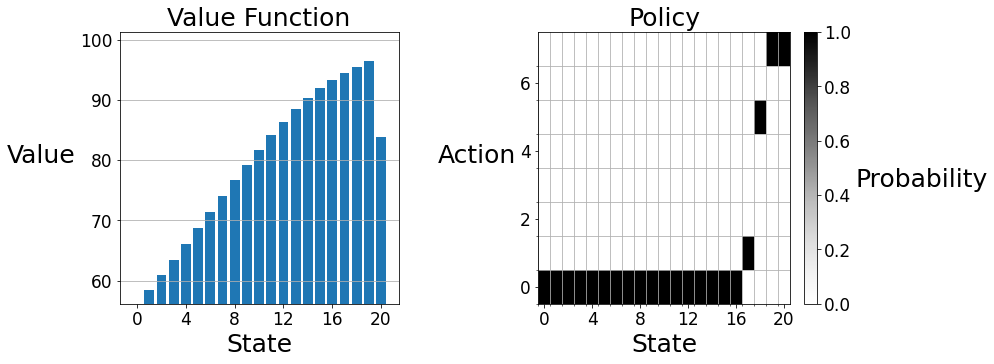

In [51]:
park.plot(V, pi)
print("")

In [52]:
States = np.array([i for i in env.S])
Value = np.array([i for i in V])
 
#pi = np.array([i for i, e in enumerate(pi) if e != 0])
df = pd.DataFrame({'States':States, 'Value':Value})
print(df)

    States      Value
0        0  56.135080
1        1  58.456394
2        2  60.910639
3        3  63.458680
4        4  66.070471
5        5  68.720623
6        6  71.386030
7        7  74.044487
8        8  76.673822
9        9  79.251301
10      10  81.753185
11      11  84.139607
12      12  86.388672
13      13  88.472109
14      14  90.359265
15      15  92.016715
16      16  93.407808
17      17  94.539812
18      18  95.541252
19      19  96.487978
20      20  83.858841


Value Iteration

In [34]:
def value_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    while True:
        delta = 0
        
        for s in env.S:
            
            v = V[s]
            optimal_update(env, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
            
        if delta < theta:
            break
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    for s in env.S:
        greedy_policy(env, V, pi, s, gamma)
    return V, pi

In [35]:
def optimal_update(env, V, s, gamma):
    opt_val = float('-inf')
    for a in env.A:
        v = 0
        transitions = env.transitions(s,a)
        for s_ in env.S:
            v += transitions[s_][1] * ( transitions[s_][0] + gamma*V[s_] )
        if opt_val < v:
            opt_val = v
    V[s] = opt_val

In [44]:
park_slots = 20
price_range = 8
env = park.Parking_Facility(park_slots, price_range)
gamma = 0.75
theta = 0.1
%time V, pi = value_iteration(env, gamma, theta)



CPU times: user 520 ms, sys: 10.4 ms, total: 531 ms
Wall time: 523 ms


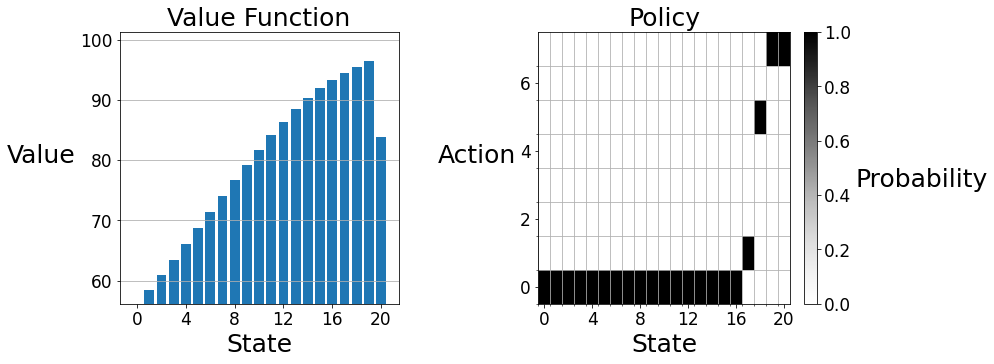

In [48]:
park.plot(V, pi)

In [49]:
States = np.array([i for i in env.S])
Value = np.array([i for i in V])
 
#pi = np.array([i for i, e in enumerate(pi) if e != 0])
df = pd.DataFrame({'States':States, 'Value':Value})
print(df)

    States      Value
0        0  56.135080
1        1  58.456394
2        2  60.910639
3        3  63.458680
4        4  66.070471
5        5  68.720623
6        6  71.386030
7        7  74.044487
8        8  76.673822
9        9  79.251301
10      10  81.753185
11      11  84.139607
12      12  86.388672
13      13  88.472109
14      14  90.359265
15      15  92.016715
16      16  93.407808
17      17  94.539812
18      18  95.541252
19      19  96.487978
20      20  83.858841
